## Search for Unknown Profiles: Dimensionality Reduction
#### Anna Möller anna.moeller@fau.de

_____
### 1. Import libraries:

In [2]:
%load_ext autoreload
%autoreload 2

In [ ]:
import matplotlib.pyplot as plt
import json
import os
import cv2
import time
import numpy as np

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import umap
from initial_analysis import ExpressionAnalyzer
import scipy

/data/je30bery/.local/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/data/je30bery/.local/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/data/je30bery/.local/lib/python3.9/site-packages/umap/distances.py:1086: NumbaDeprecationWarning:

In [ ]:
f = open('/data_slow/je30bery/spatial_proteomics/config.json')
config = json.load(f)

data_path = config["ALS"]
segmentation_results_dir = config["segmentation_results"]
base_path = config["base_path"]

_____
### 2. Get floating-point expression data and normalize:

In [3]:
segment = "nuclei"
EA = ExpressionAnalyzer(data_path=data_path, segmentation_results_dir_path=segmentation_results_dir, base_path=base_path, membrane_markers=["cd45"], save_plots=False)
EA.run(segment=segment, profile=None)

Calculating expression: 100%|███████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 459.73it/s]


In [4]:
EA.expression_data = EA.expression_data.sort_index()

y_cols = ["Group", "Sample"]
ys = EA.expression_data[y_cols]
Xs = EA.expression_data.drop(labels=y_cols, axis=1)

Xs_normalized = StandardScaler().fit_transform(Xs)

#df_normalized = pd.DataFrame(data=Xs, index=Xs.index, columns=Xs.columns)

#binary_df = (df_normalized > 0)
#binary_df = binary_df.astype(int)
#binary_df.to_pickle(f"./binary_expression_{segment}_1.pkl")  

_____
### 3. UMAP:

In [5]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(Xs_normalized)
res_df = ys.copy()
res_df["UMAP Dim1"] = embedding[:,0]
res_df["UMAP Dim2"] = embedding[:,1]

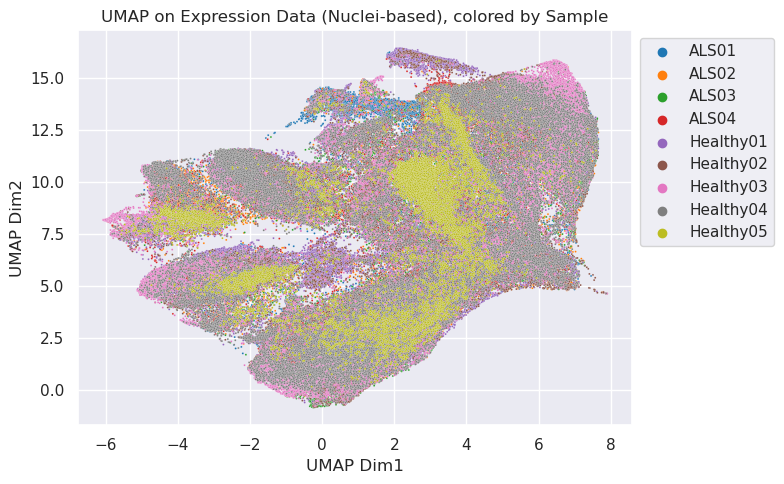

In [6]:
plt.figure(figsize=(8,5))
sns.set_theme(palette=None)
sns.scatterplot(res_df, x="UMAP Dim1", y="UMAP Dim2", hue="Sample", s=2)
plt.title(f"UMAP on Expression Data ({segment.capitalize()}-based), colored by Sample")
#plt.legend(loc="upper left")

plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig(f"umap_samples_{segment}.png")
#plt.show()

<Figure size 640x480 with 0 Axes>

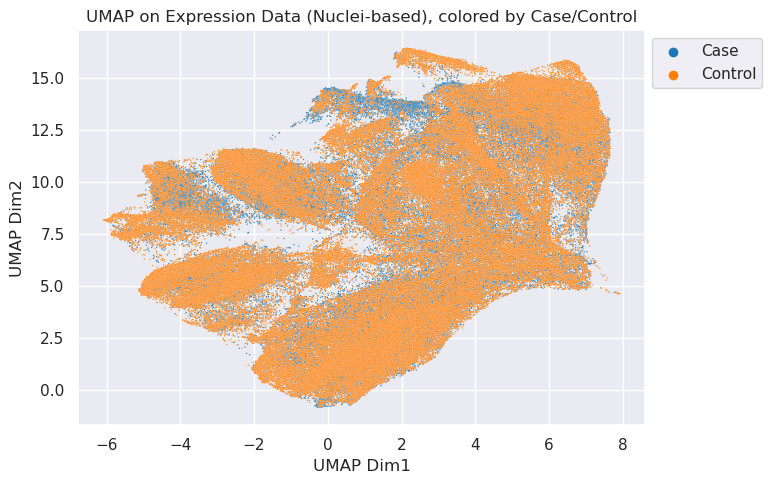

In [7]:
#reducer = umap.UMAP()
#embedding = reducer.fit_transform(Xs_normalized)
#res_df = ys.copy()
#res_df["UMAP Dim1"] = embedding[:,0]
#res_df["UMAP Dim2"] = embedding[:,1]
plt.clf()
plt.figure(figsize=(8,5))
sns.scatterplot(res_df, x="UMAP Dim1", y="UMAP Dim2", hue="Group", s=1)
plt.title(f"UMAP on Expression Data ({segment.capitalize()}-based), colored by Case/Control")
#plt.legend(loc="upper left")

plt.legend(bbox_to_anchor=(1.22, 1))
plt.tight_layout()
plt.savefig(f"umap_condition_{segment}.png")
#plt.show()

_____
### 4. PCA:

In [8]:
pca = PCA(2)
res = pca.fit_transform(Xs_normalized)
res_df = ys.copy()
res_df["PCA Dim1"] = res[:,0]
res_df["PCA Dim2"] = res[:,1]

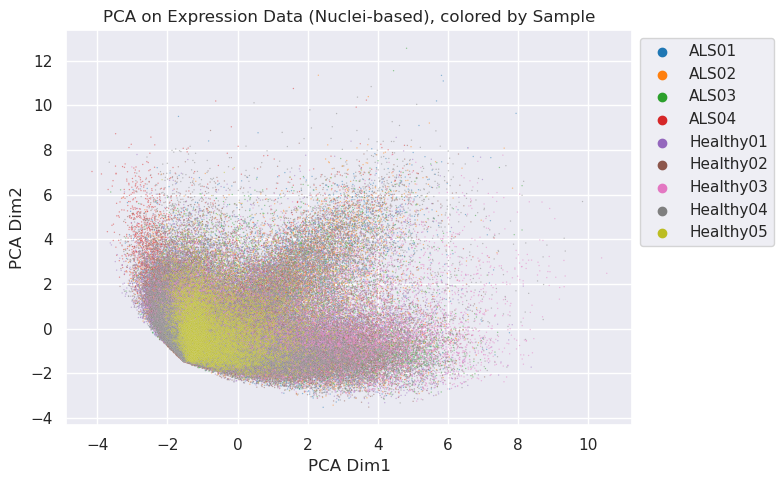

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(res_df, x="PCA Dim1", y="PCA Dim2", hue="Sample", alpha=0.5, s=1)
plt.title(f"PCA on Expression Data ({segment.capitalize()}-based), colored by Sample")
#plt.legend(loc="upper left")

plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig(f"pca_samples_{segment}.png")
#plt.show()

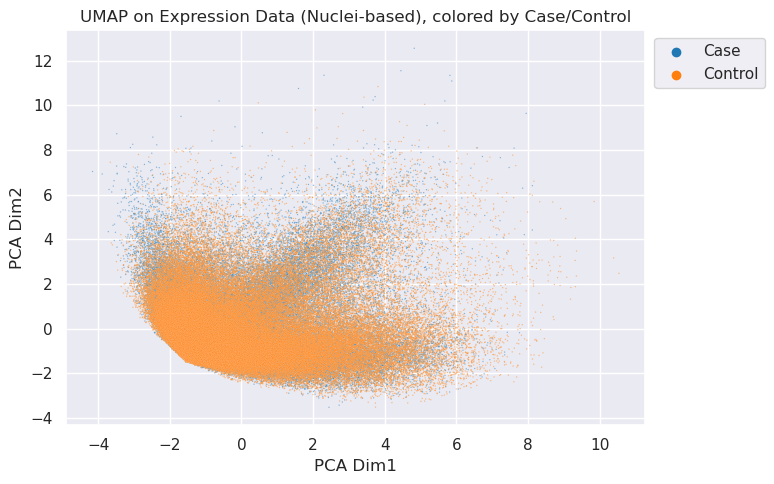

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(res_df, x="PCA Dim1", y="PCA Dim2", hue="Group", alpha=0.5, s=1)
plt.title(f"UMAP on Expression Data ({segment.capitalize()}-based), colored by Case/Control")
#plt.legend(loc="upper left")

plt.legend(bbox_to_anchor=(1.22, 1))

plt.tight_layout()
plt.savefig(f"pca_condition_{segment}.png")
#plt.show()

In [11]:
pca.components_

array([[-0.20345682,  0.08721211,  0.37809623,  0.22841986, -0.05069786,
         0.39470141, -0.08500026,  0.05189113,  0.26205244,  0.37077685,
         0.26193978,  0.20742234,  0.15847185,  0.39637626,  0.22929791,
        -0.05629879, -0.17773483, -0.01386866, -0.00705579],
       [ 0.288976  ,  0.33298777, -0.06173663, -0.15529932,  0.24974516,
        -0.19861082,  0.26920311,  0.42482247, -0.12062209,  0.17548563,
         0.20629427,  0.35387239,  0.18321127,  0.14795362, -0.00731708,
         0.2178238 ,  0.29222597,  0.11474114,  0.09095357]])

In [12]:
pca.explained_variance_

array([3.41042349, 2.53311175])